In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Load and Inspect the Dataset**

In [87]:
# Load the dataset
df = pd.read_csv('HDFCBANK.csv')

In [88]:
# Display the first few rows of the dataframe
print(df.head())

         Date   Open   High    Low  Close  Adj Close    Volume
0  1996-01-01  3.030  3.030  2.925  2.980   2.417746  350000.0
1  1996-01-02  2.980  3.025  2.950  2.975   2.413689  412000.0
2  1996-01-03  2.975  2.995  2.950  2.985   2.421803  284000.0
3  1996-01-04  2.985  2.980  2.940  2.965   2.405575  282000.0
4  1996-01-05  2.965  2.980  2.950  2.960   2.401519  189000.0


In [89]:
# Display the summary statistics of the dataframe
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  6560.000000  6560.000000  6560.000000  6560.000000  6560.000000   
mean    337.150200   340.552696   333.371148   337.043588   328.143780   
std     428.941250   432.701668   424.683662   428.705850   426.934669   
min       2.435000     2.435000     2.395000     2.435000     1.975574   
25%      23.799999    24.098750    23.309999    23.653751    20.443190   
50%     134.424995   138.074997   130.504998   133.782501   122.550351   
75%     513.462509   518.424988   509.062492   513.737488   495.121086   
max    1705.000000  1725.000000  1671.000000  1688.699951  1688.699951   

             Volume  
count  6.560000e+03  
mean   4.941709e+06  
std    5.711678e+06  
min    0.000000e+00  
25%    1.563008e+06  
50%    3.427885e+06  
75%    6.361122e+06  
max    2.011300e+08  


In [90]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6567 non-null   object 
 1   Open       6560 non-null   float64
 2   High       6560 non-null   float64
 3   Low        6560 non-null   float64
 4   Close      6560 non-null   float64
 5   Adj Close  6560 non-null   float64
 6   Volume     6560 non-null   float64
dtypes: float64(6), object(1)
memory usage: 359.3+ KB


In [92]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0
6566,2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976,1521.599976,5768339.0


In [93]:
df.shape

(6567, 7)

**Step 2: Exploratory Data Analysis (EDA)**

In [94]:
# Checking for missing values
print(df.isnull().sum())

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64


In [95]:
# Filling missing values
df.ffill(inplace=True)

In [96]:
# Checking for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


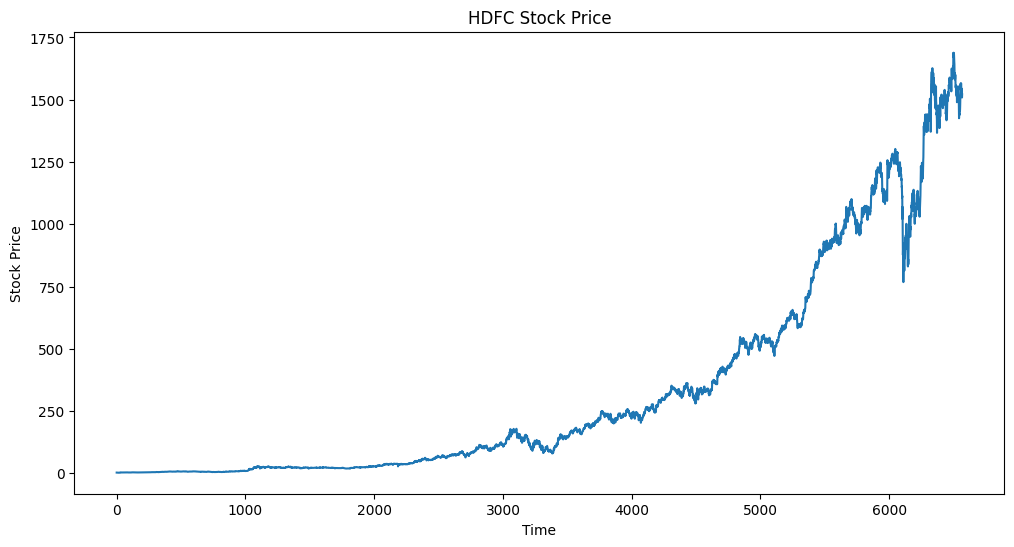

In [97]:
# Plotting the closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('HDFC Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [98]:
# Feature selection and scaling
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

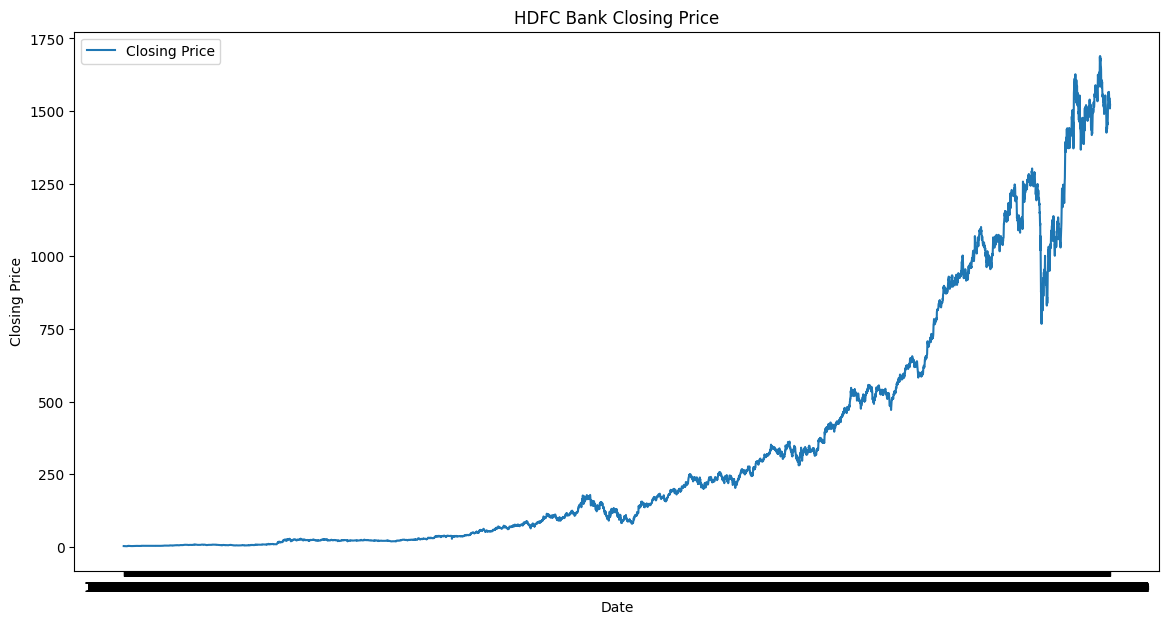

In [99]:
# Plotting the closing price
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('HDFC Bank Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

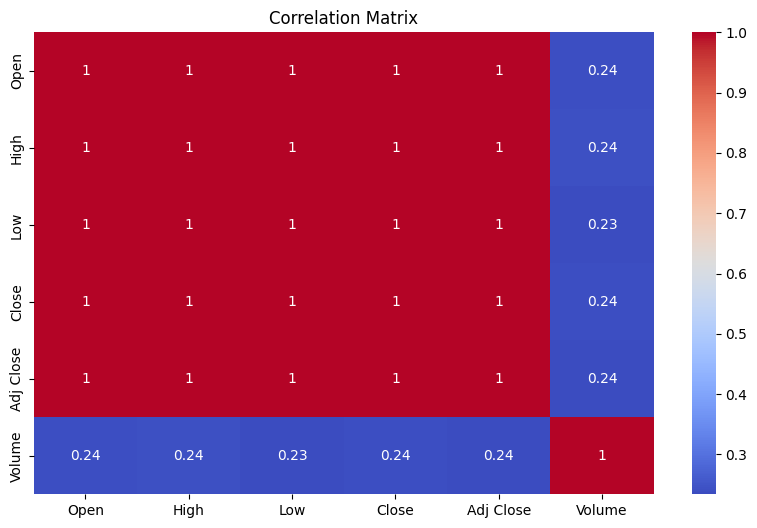

In [100]:
# Heatmap for correlation
plt.figure(figsize=(10,6))
# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

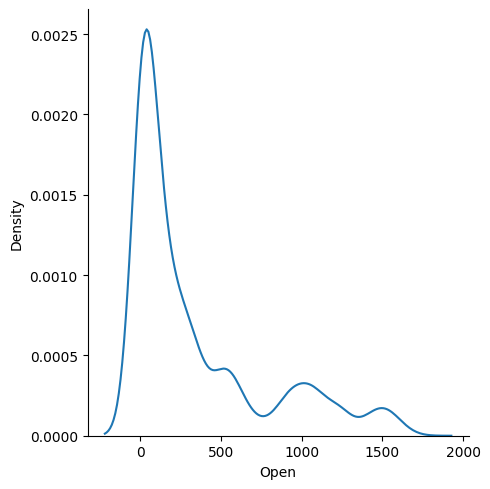

In [101]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Adj Close', ylabel='High'>

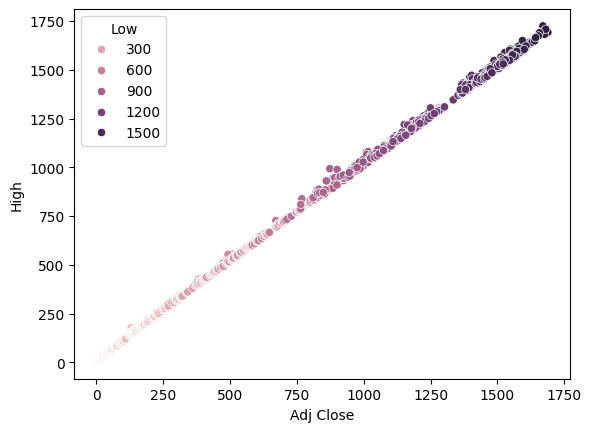

In [102]:
# About The Adj Close , High and low Stock prices
sns.scatterplot(x="Adj Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

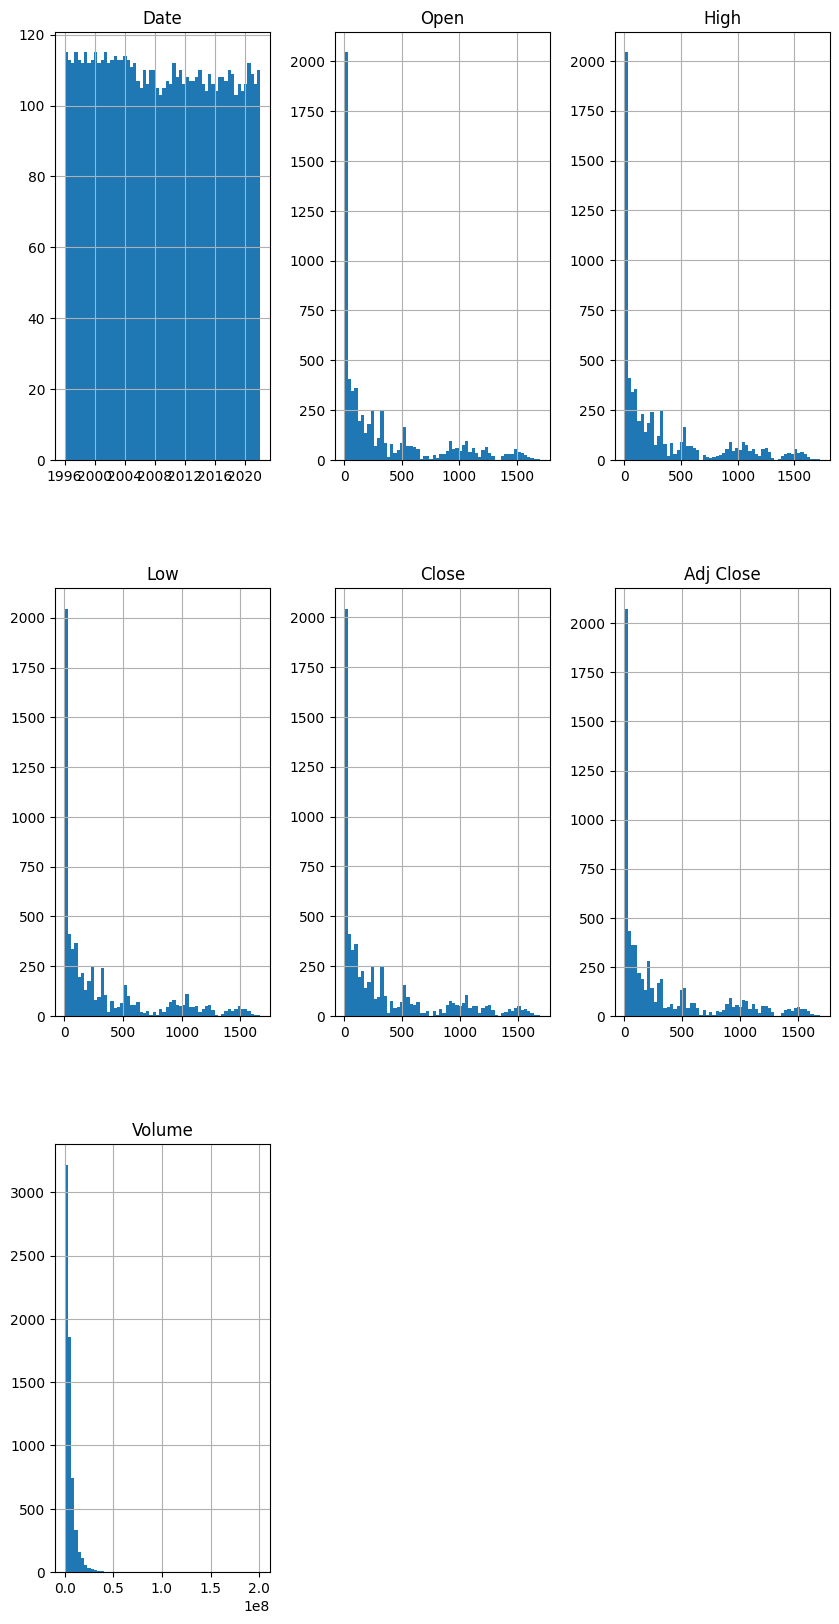

In [103]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

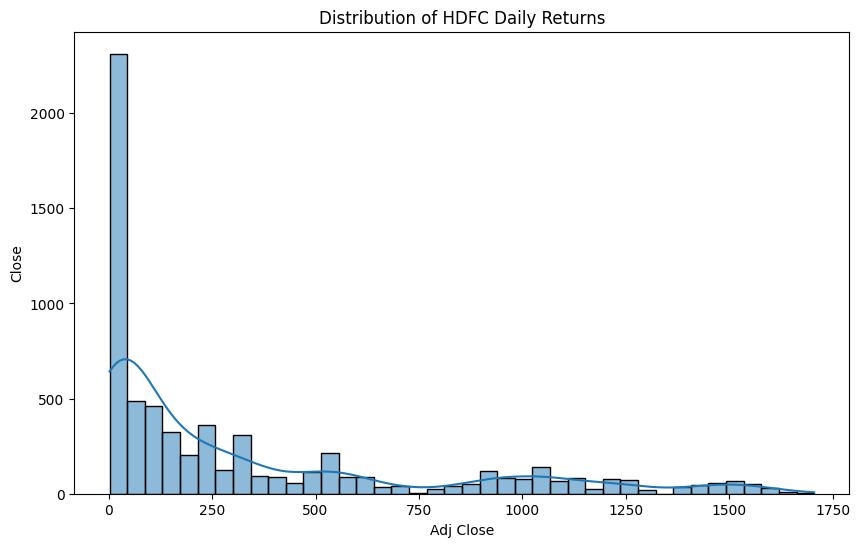

In [104]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of HDFC Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

In [105]:
# Plot HDFC High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='HDFC '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

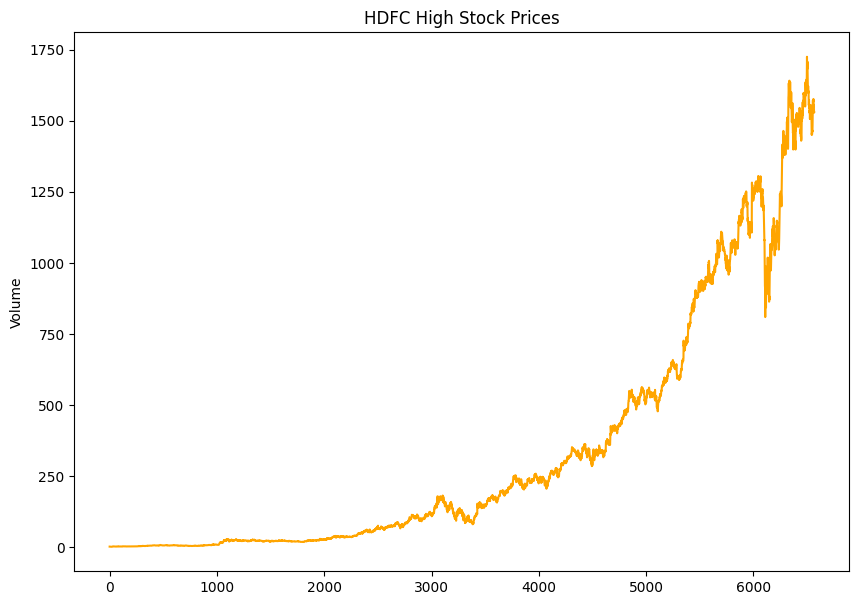

In [106]:
volume_analysis(df,'High')

In [107]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [108]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

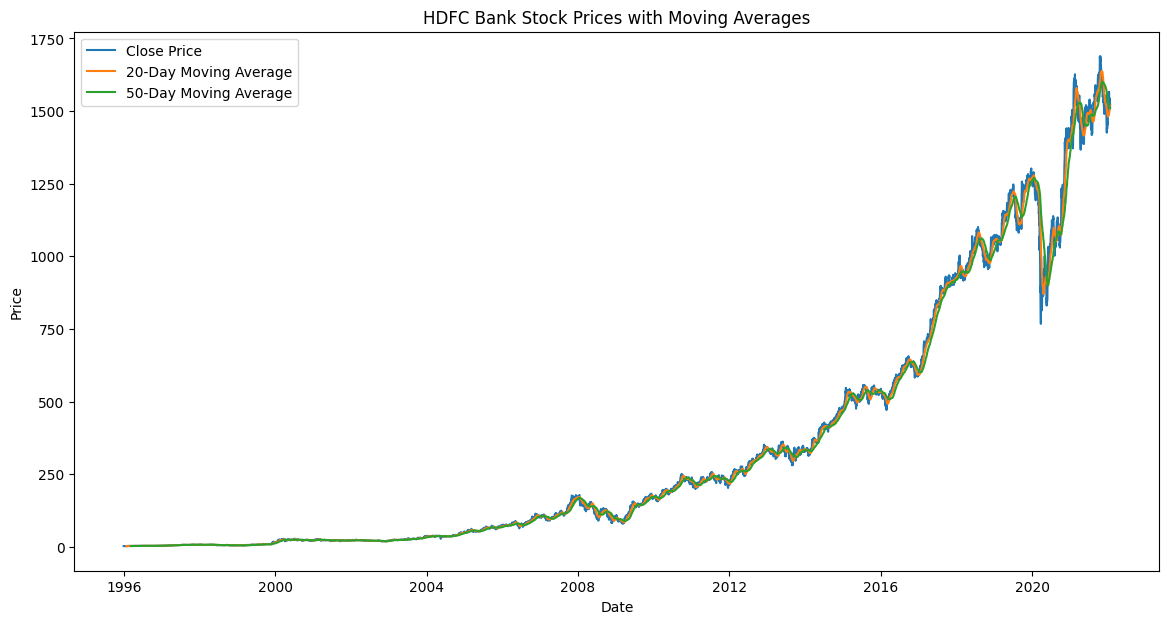

In [109]:
# Calculate and plot moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day Moving Average')
plt.plot(df['MA50'], label='50-Day Moving Average')
plt.title('HDFC Bank Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Step 3: split the dataset into training and testing sets**

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Use MinMaxScaler instead of MinMaxScale

In [111]:
# Normalizing the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [112]:
import numpy as np

# Prepare features and labels for models
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X, y = create_dataset(scaled_data, time_step)

In [113]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5172, 100) (1294, 100) (5172,) (1294,)


In [137]:
import warnings
warnings.filterwarnings('ignore')

**Step 4: Implementing the Models**

**ARIMA Model**


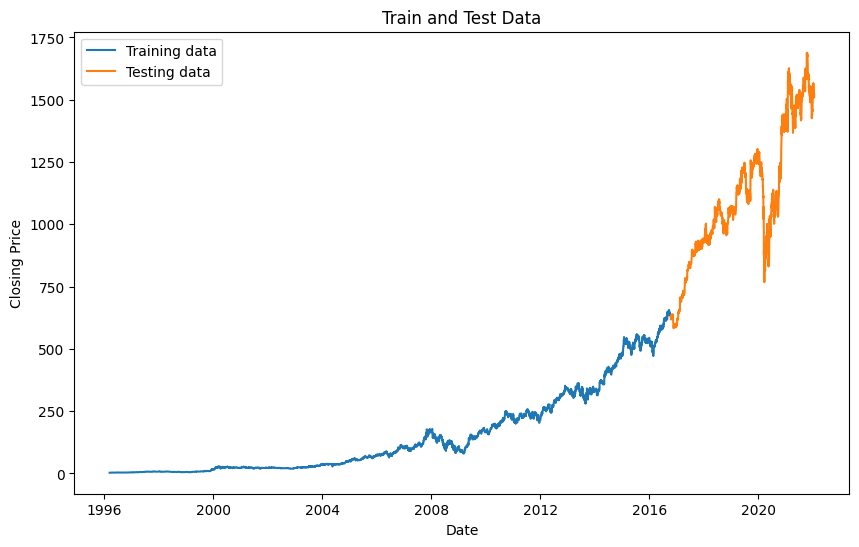

In [138]:
# Perform any necessary differencing to make the series stationary
df['Close_diff'] = df['Close'].diff()

# Drop the first row which will have an NaN value after differencing
df = df.dropna()

# Split into training and testing datasets
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# Plot the training and testing data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training data')
plt.plot(test, label='Testing data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Train and Test Data')
plt.legend()
plt.show()

In [139]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()  # Remove the 'disp' argument

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5212
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13256.925
Date:                Wed, 26 Feb 2025   AIC                          26525.850
Time:                        17:42:12   BIC                          26565.201
Sample:                             0   HQIC                         26539.613
                               - 5212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0001      0.008      0.015      0.988      -0.016       0.016
ar.L2         -0.0774      0.008     -9.542      0.000      -0.093      -0.061
ar.L3         -0.0197      0.008     -2.319      0.0

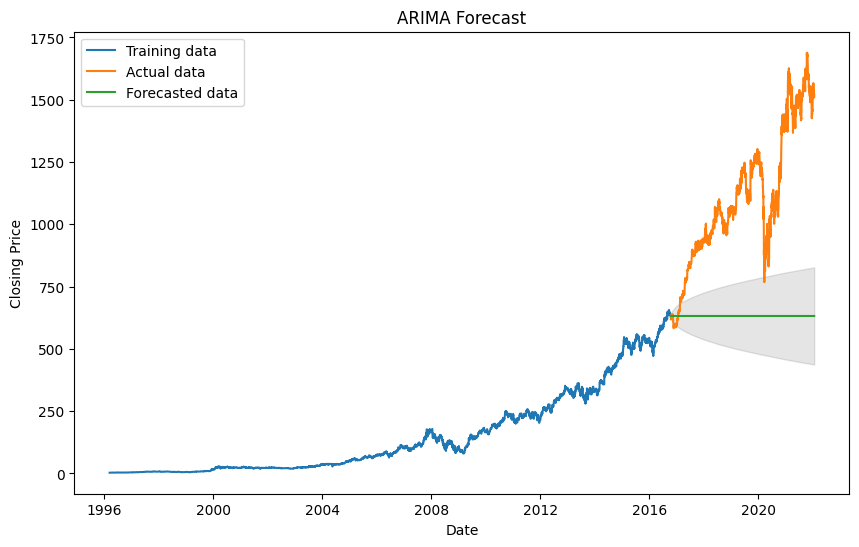

In [140]:
# Forecasting
forecast_results = model_fit.forecast(steps=len(test))  # Store all returned values
forecast = forecast_results  # The predicted mean is directly in the results
conf_int = model_fit.get_forecast(steps=len(test)).conf_int()  # Get confidence intervals separately

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training data')
plt.plot(test, label='Actual data')
plt.plot(test.index, forecast, label='Forecasted data')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)  # Access confidence intervals as a DataFrame
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


**XGBoost Model**

In [141]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 298106.73024135985, MAE: 477.7144190552845


In [142]:
# Create features for XGBoost
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['DayOfYear'] = df.index.dayofyear
df['WeekOfYear'] = df.index.isocalendar().week

# Define features and target
X = df[['Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear']]
y = df['Close']

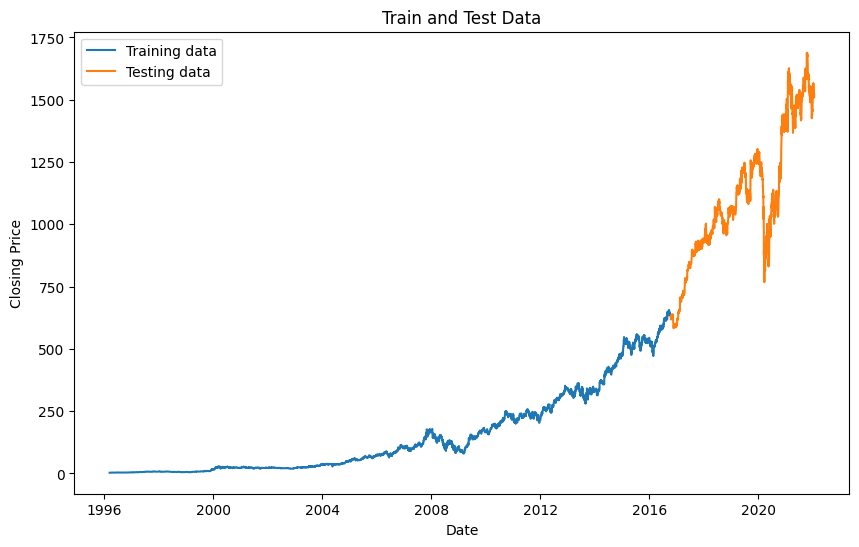

In [143]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Plot the training and testing data
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Training data')
plt.plot(y_test.index, y_test, label='Testing data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Train and Test Data')
plt.legend()
plt.show()

In [144]:
!pip install xgboost
import xgboost as xgb

# Fit the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
xgb_model.fit(X_train, y_train)

# Summary of the model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


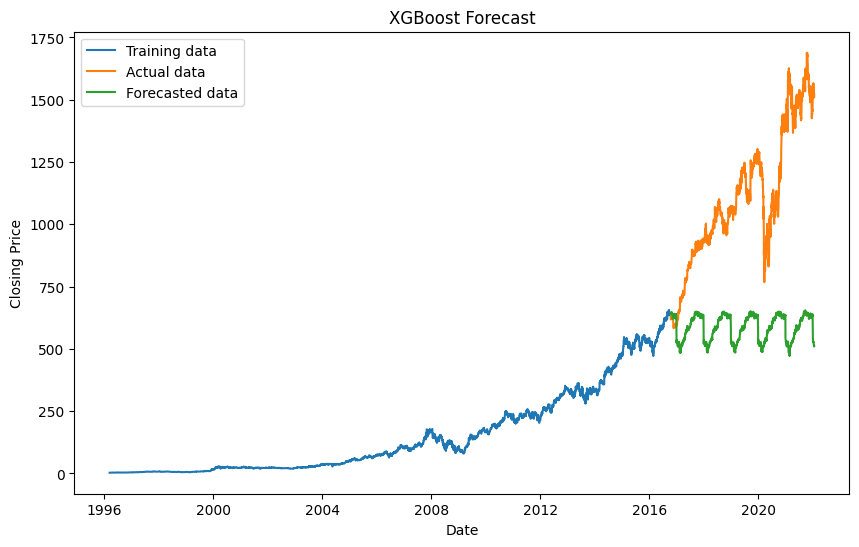

In [145]:
# Forecasting
y_pred = xgb_model.predict(X_test)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Training data')
plt.plot(y_test.index, y_test, label='Actual data')
plt.plot(y_test.index, y_pred, label='Forecasted data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('XGBoost Forecast')
plt.legend()
plt.show()

In [146]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 343964.81151151954, MAE: 522.9065767875034


**Logistic Regression**


In [147]:
# Data preprocessing for Logistic Regression
df['Price_Change'] = df['Close'].pct_change()
df['Direction'] = np.where(df['Price_Change'] > 0, 1, 0)
df = df.dropna()

In [148]:
# Feature and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Direction']

In [149]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred = log_reg.predict(X_test_scaled)


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression model with increased max_iter
log_reg = LogisticRegression(max_iter=500)  # Increase max_iter
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')


Logistic Regression Accuracy: 0.7735993860322333


**LSTM Model**

In [152]:
# Data preprocessing for LSTM
data = df['Close'].values
data = data.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [153]:
# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Build LSTM model
model = Sequential()

# Define Input shape using the Input layer
model.add(Input(shape=(time_step, 1)))  # First layer with input shape

# Add LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))

# Add Dense layers
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [155]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

5111/5111 ━━━━━━━━━━━━━━━━━━━━ 160s 30ms/step - loss: 2.8737e-04


In [156]:
# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


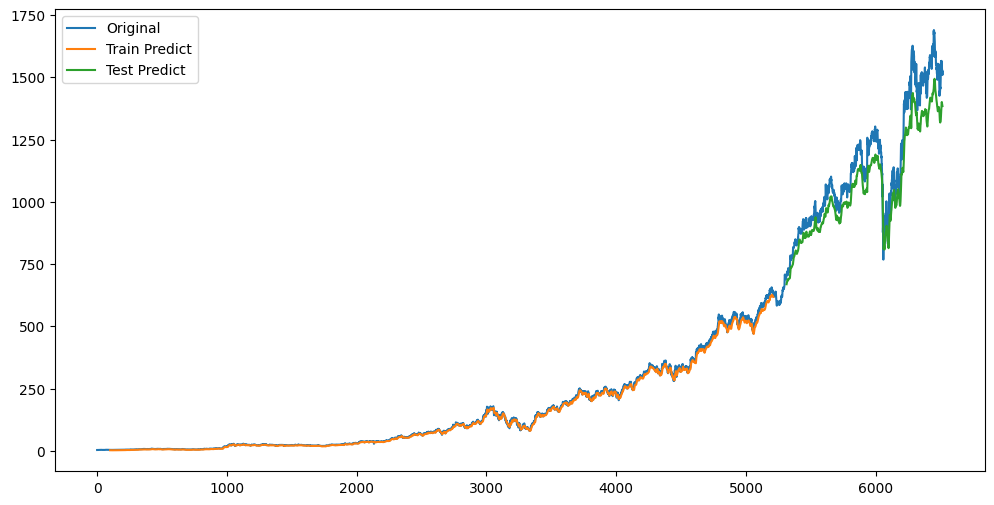

In [157]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original')
plt.plot(range(time_step, time_step+len(train_predict)), train_predict, label='Train Predict')
# Adjusted x-values to match the length of test_predict
plt.plot(range(len(train_data)+time_step, len(train_data)+time_step+len(test_predict)), test_predict, label='Test Predict')
plt.legend()
plt.show()

In [158]:
# Evaluate
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

Train RMSE: 218.3046823145433, Test RMSE: 1081.5616873148729
